In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [2]:

####################################################################################################
####################################################################################################

file_all = "data/helsinki_data.pkl"




In [15]:

####################################################################################################
####################################################################################################

df_all       = pd.read_pickle(file_all)
nEventsTotal = df_all.shape[0]


####################################################################################################
####################################################################################################

# Select events with interactions
df_all = df_all[df_all['interactions'] > 0]


# Check that the same algorithm is always used
algo = 'PosRecTopPatternFit'

if (df_all[df_all['intr_xy_posrec_algorithm'] != algo].shape[0] > 0):
    
    print("Error! Found unexpected algorithms")
    raise()
    
else:
    
    print("Using " + algo + " position reconstruction algorithm")
     

# Drop unused columns
df_all = df_all.drop(['recoil_type']              , axis=1)
df_all = df_all.drop(['s1_photons']               , axis=1)
df_all = df_all.drop(['s2_electrons']             , axis=1)
df_all = df_all.drop(['depth']                    , axis=1)
df_all = df_all.drop(['intr_xy_posrec_algorithm'] , axis=1)
df_all = df_all.drop(['t']                        , axis=1)
df_all = df_all.drop(['instruction']              , axis=1)

#df_all = df_all[:][['event_number', 'x', 'y', 'intr_x', 'intr_y']]

#
df_all = df_all.reset_index(drop=True)

#
cols = list(df_all.columns.values)
cols.remove('interactions')
cols.insert(0, 'interactions')
cols.remove('event_number')
cols.insert(0, 'event_number')
df_all = df_all[cols]

#
df_all.rename(columns = {'x'           :'true_x'}, inplace = True)
df_all.rename(columns = {'y'           :'true_y'}, inplace = True)
df_all.rename(columns = {'intr_x'      :'reco_x'}, inplace = True)
df_all.rename(columns = {'intr_y'      :'reco_y'}, inplace = True)
df_all.rename(columns = {'event_number':'event'}, inplace = True)
df_all.rename(columns = {'intr_xy_posrec_goodness_of_fit':'goodness_of_fit'}, inplace = True)




Using PosRecTopPatternFit position reconstruction algorithm


In [16]:

####################################################################################################
####################################################################################################

nEventsUsable = df_all.shape[0]

print()
print("Using " + str(nEventsUsable) + " of " + str(nEventsTotal) + " events")
print()

display(df_all[:][0:10])



Using 6297 of 10000 events



,event,interactions,true_x,true_y,reco_x,reco_y,goodness_of_fit,s2_area_000,s2_area_001,s2_area_002,...,s2_area_117,s2_area_118,s2_area_119,s2_area_120,s2_area_121,s2_area_122,s2_area_123,s2_area_124,s2_area_125,s2_area_126
0,1,1,2.626434,-17.960824,1.620927,-16.084586,218.693811,1.996201,0.0,0.0,...,3.401516,0.0,1.277412,5.448813,1.011515,5.978631,33.596052,12.064080,5.395413,14.160685
1,3,1,10.907536,-6.312277,10.099624,-5.860276,272.932491,0.000000,0.0,0.0,...,3.825090,0.0,2.068674,2.355067,16.410299,108.660534,38.487834,11.907051,0.000000,12.058119
2,6,1,2.726006,37.749081,2.369048,34.787594,157.902515,5.313308,0.0,0.0,...,0.000000,0.0,2.130481,2.130350,1.467398,0.499628,0.000000,0.994353,3.225136,0.000000
3,7,2,-21.259064,-4.445240,-21.072055,-4.114662,242.419883,0.470188,0.0,0.0,...,384.776221,0.0,21.555957,19.881126,2.080295,8.968903,14.491470,36.443323,57.291382,16.473195
4,8,2,-18.078293,-23.212466,-16.832707,-21.570802,235.232525,0.693138,0.0,0.0,...,10.365254,0.0,12.813328,2.363114,6.143904,5.950563,7.707173,10.770227,5.779876,5.001392
5,9,2,-24.188771,-7.677977,-23.565789,-7.356516,202.182240,0.988205,0.0,0.0,...,185.303171,0.0,24.195650,7.163852,11.236424,11.282692,9.922583,32.182603,16.723571,11.061420
6,13,1,-0.304233,32.576034,0.872807,28.303885,111.817900,0.844570,0.0,0.0,...,3.816871,0.0,0.752057,1.521614,1.043226,0.000000,0.000000,0.000000,0.000000,0.000000
7,14,1,36.200947,-5.005732,33.291353,-4.613409,160.807377,0.000000,0.0,0.0,...,2.951100,0.0,3.537733,1.558720,0.000000,3.048161,2.951397,0.000000,1.492515,2.332859
8,15,1,26.462858,6.883397,25.311404,6.608396,279.573190,0.769004,0.0,0.0,...,6.052675,0.0,0.000000,2.240920,7.371777,8.466883,2.966773,1.703765,5.671526,2.313105
9,16,1,-15.268880,-28.822583,-14.588346,-26.807644,200.633632,0.000000,0.0,0.0,...,5.437694,0.0,3.408124,2.530908,1.422448,0.977249,6.792698,9.792721,1.107398,5.144276


In [24]:

####################################################################################################
####################################################################################################

arr_x_true = df_all[:]['x'].as_matrix()
arr_y_true = df_all[:]['y'].as_matrix()
arr_x_reco = df_all[:]['intr_x'].as_matrix()
arr_y_reco = df_all[:]['intr_y'].as_matrix()
arr_dx     = arr_x_true - arr_x_reco
arr_dy     = arr_y_true - arr_y_reco



In [25]:


####################################################################################################
####################################################################################################

xmin_true = np.amin(arr_x_true)
xmin_reco = np.amin(arr_x_reco)
xmax_true = np.amax(arr_x_true)
xmax_reco = np.amax(arr_x_reco)
xmin_dx   = np.amin(arr_x_true)
xmax_dx   = np.amax(arr_x_reco)

print("xmin_true: " + str(xmin_true))
print("xmin_reco: " + str(xmin_reco))
print("xmax_true: " + str(xmax_true))
print("xmax_reco: " + str(xmax_reco))
print("xmin_dc:   " + str(xmin_dx))
print("xmax_dc:   " + str(xmax_dx))

xy_min     = -45
xy_max     =  45
xy_nbins   = 90

dxy_min   = -6
dxy_max   =  6
dxy_nbins = 12*10

eps   = .001

#
dx_mean = np.mean(arr_dx)
dx_std  = np.std(arr_dx)
dy_mean = np.mean(arr_dy)
dy_std  = np.std(arr_dy)

arr_dx_ovflw = arr_dx.copy()
arr_dx_ovflw[arr_dx_ovflw < dxy_min] = dxy_min + eps
arr_dx_ovflw[arr_dx_ovflw > dxy_max] = dxy_max - eps

arr_dy_ovflw = arr_dy.copy()
arr_dy_ovflw[arr_dy_ovflw < dxy_min] = dxy_min + eps
arr_dy_ovflw[arr_dy_ovflw > dxy_max] = dxy_max - eps

x_true_mean = np.mean(arr_x_true)
x_true_std  = np.std(arr_x_true)
x_reco_mean = np.mean(arr_x_reco)
x_reco_std  = np.std(arr_x_reco)

y_true_mean = np.mean(arr_y_true)
y_true_std  = np.std (arr_y_true)
y_reco_mean = np.mean(arr_y_reco)
y_reco_std  = np.std (arr_y_reco)



xmin_true: -40.4470078377
xmin_reco: nan
xmax_true: 40.0572338064
xmax_reco: nan
xmin_dc:   -40.4470078377
xmax_dc:   nan


/Users/dbarge/anaconda3/anaconda3-2.4/lib/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/dbarge/anaconda3/anaconda3-2.4/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/Users/dbarge/anaconda3/anaconda3-2.4/lib/python3.5/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
/Users/dbarge/anaconda3/anaconda3-2.4/lib/python3.5/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater


AttributeError: max must be larger than min in range parameter.

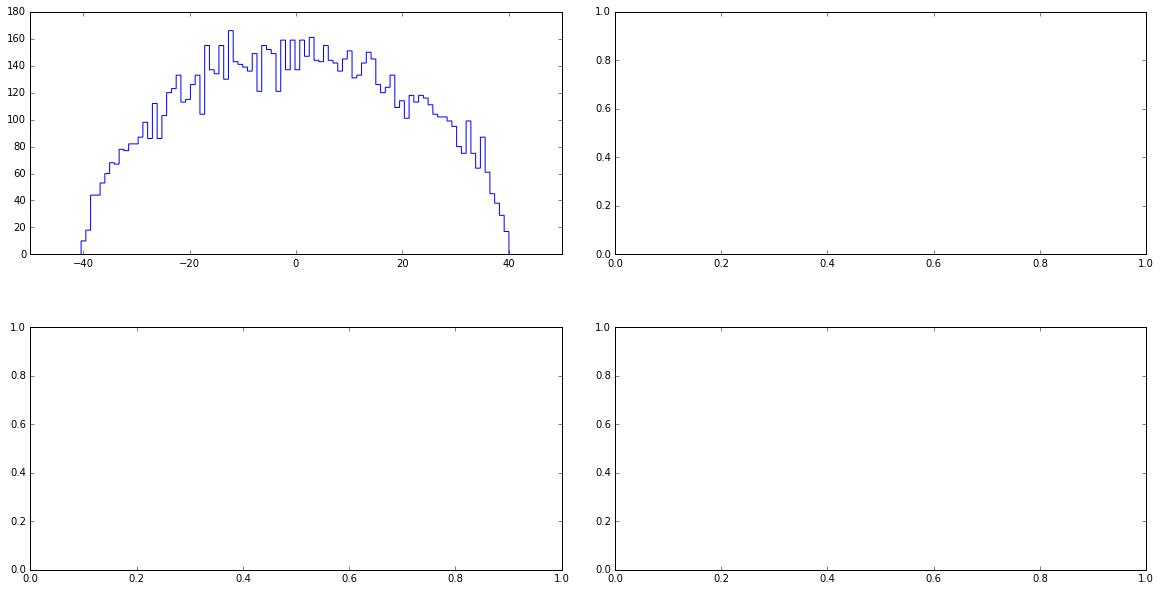

In [26]:


####################################################################################################
####################################################################################################

rows = 2
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

x_label_true = 'true (std: %.02f, mean: %.02f)'% (x_true_std, x_true_mean)
x_label_reco = 'reco (std: %.02f, mean: %.02f)'% (x_reco_std, x_reco_mean)
y_label_true = 'true (std: %.02f, mean: %.02f)'% (y_true_std, y_true_mean)
y_label_reco = 'reco (std: %.02f, mean: %.02f)'% (y_reco_std, y_reco_mean)
x_label_true = 'true (std: %.02f, mean: %.02f)'% (x_true_std, x_true_mean)
x_label_reco = 'reco (std: %.02f, mean: %.02f)'% (x_reco_std, x_reco_mean)

dx_label = 'dx (std: %.03f, mean: %.02f)'% (dx_std, dx_mean)
dy_label = 'dy (std: %.03f, mean: %.02f)'% (dy_std, dy_mean)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 1)
plt.hist(arr_x_true, bins=xy_nbins, label=x_label_true, fill=False, histtype='step')
plt.hist(arr_x_reco, bins=xy_nbins, label=x_label_reco, fill=False, histtype='step')
plt.xlim([xy_min, xy_max])
plt.xlabel('X (cm)', fontsize=18)
plt.title('X Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 2)
plt.hist(arr_y_true, bins=xy_nbins, label=y_label_true, fill=False, histtype='step')
plt.hist(arr_y_reco, bins=xy_nbins, label=y_label_reco, fill=False, histtype='step')
plt.xlim([xy_min, xy_max])
plt.xlabel('Y (cm)', fontsize=18)
plt.title('Y Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 3)
plt.hist(arr_dx_ovflw, bins=dxy_nbins, label=dx_label, fill=True, histtype='bar', color='r')
plt.xlim([dxy_min, dxy_max])
plt.ylim([0, 900])
plt.xlabel('dx (cm)', fontsize=18)
plt.title('X true - X reco', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 4)
plt.hist(arr_dy_ovflw, bins=dxy_nbins, label=dy_label, fill=True, histtype='bar', color='r')
plt.xlim([dxy_min, dxy_max])
plt.ylim([0, 900])
plt.xlabel('dy (cm)', fontsize=18)
plt.title('Y true - Y reco', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

